# Final Model Building

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date
import yfinance as yf

In [2]:
df = yf.download("AAPL", start="2010-01-01", end=str(date.today()))[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2010-01-04,6.478998,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,6.490200,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,6.386966,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,6.375157,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,6.417541,7.510714,7.571429,7.466429,7.570714,447610800


In [3]:
df.tail()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2023-11-17,189.690002,190.250000,190.380005,188.570007,189.690002,50922700
2023-11-20,191.449997,189.889999,191.910004,189.880005,191.449997,46505100
2023-11-21,190.639999,191.410004,191.520004,189.740005,190.639999,38134500
2023-11-22,191.309998,191.490005,192.929993,190.830002,191.309998,39617700
2023-11-24,189.970001,190.869995,190.899994,189.250000,189.970001,24048300


In [4]:
df1=df.copy()
df=df.reset_index()

In [5]:
df=df.drop(['Adj Close'],axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


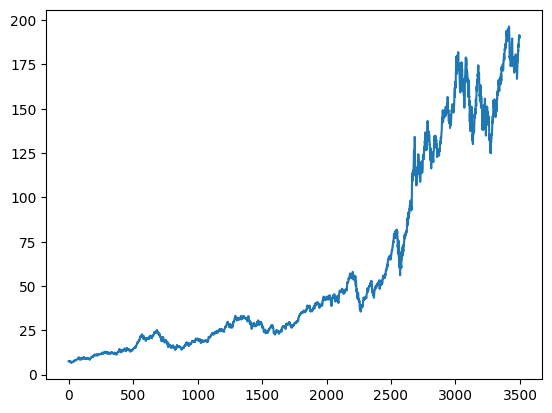

In [6]:
plt.plot(df['Close'])

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3493    181.600701
3494    181.619301
3495    181.586001
3496    181.574501
3497    181.560901
Name: Close, Length: 3498, dtype: float64

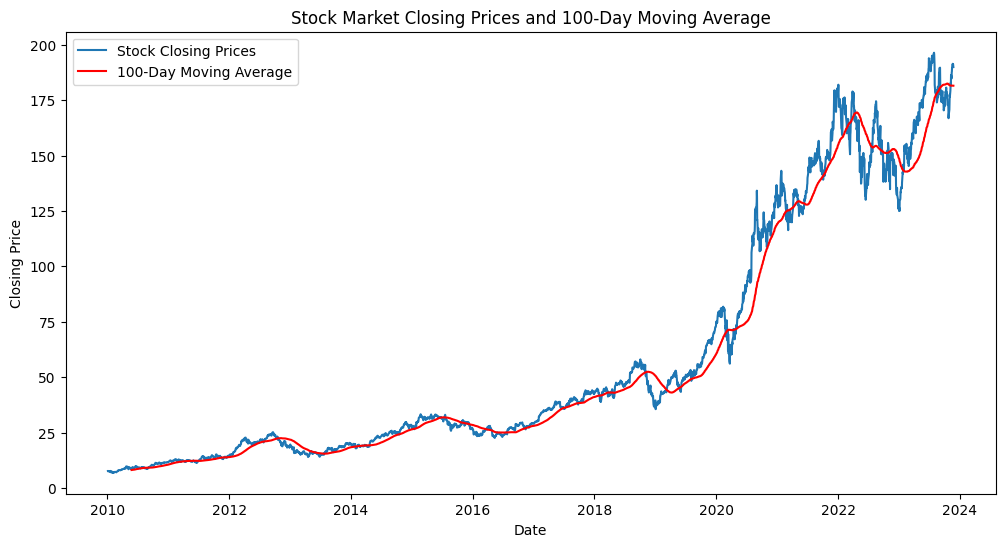

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df = df.sort_values('Date')

# Calculate the 100-day moving average
df['100_MA'] = df['Close'].rolling(window=100).mean()

# Plot the stock closing prices and the 100-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Closing Prices')
plt.plot(df['Date'], df['100_MA'], label='100-Day Moving Average', color='red')
plt.title('Stock Market Closing Prices and 100-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

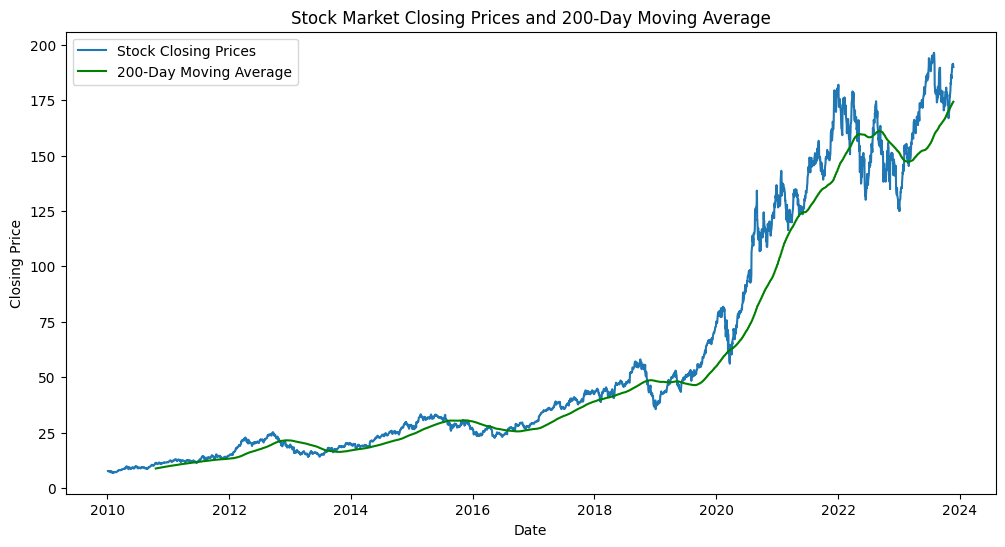

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df = df.sort_values('Date')

# Calculate the 100-day moving average
df['200_MA'] = df['Close'].rolling(window=200).mean()

# Plot the stock closing prices and the 100-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Closing Prices')
plt.plot(df['Date'], df['200_MA'], label='200-Day Moving Average', color='green')
plt.title('Stock Market Closing Prices and 200-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

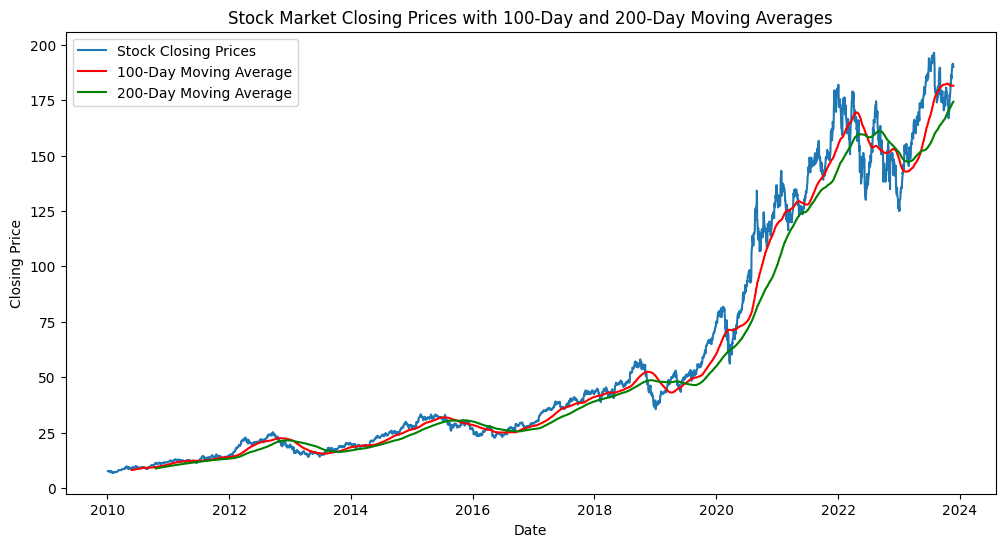

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df = df.sort_values('Date')

# Calculate the 100-day and 200-day moving averages
df['100_MA'] = df['Close'].rolling(window=100).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

# Plot the stock closing prices, 100-day, and 200-day moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Closing Prices')
plt.plot(df['Date'], df['100_MA'], label='100-Day Moving Average', color='red')
plt.plot(df['Date'], df['200_MA'], label='200-Day Moving Average', color='green')
plt.title('Stock Market Closing Prices with 100-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Model Building

In [11]:
df.shape

(3498, 8)

In [12]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape,data_testing.shape)

(2448, 1) (1050, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.92992371],
       [0.93476164],
       [0.92967936]])

In [15]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [16]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [17]:
model=Sequential()
#Input Layer
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

#2nd Layer 
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


#3rd Layer 
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


#4th Layer
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error',run_eagerly=True)
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
74/74 [==============================] - 88s 1s/step - loss: 0.0283
Epoch 2/50
74/74 [==============================] - 85s 1s/step - loss: 0.0070
Epoch 3/50
74/74 [==============================] - 83s 1s/step - loss: 0.0064
Epoch 4/50
74/74 [==============================] - 84s 1s/step - loss: 0.0076
Epoch 5/50
74/74 [==============================] - 85s 1s/step - loss: 0.0058
Epoch 6/50
74/74 [==============================] - 87s 1s/step - loss: 0.0057
Epoch 7/50
74/74 [==============================] - 86s 1s/step - loss: 0.0056
Epoch 8/50
74/74 [==============================] - 86s 1s/step - loss: 0.0053
Epoch 9/50
74/74 [==============================] - 86s 1s/step - loss: 0.0047
Epoch 10/50
74/74 [==============================] - 86s 1s/step - loss: 0.0047
Epoch 11/50
74/74 [==============================] - 87s 1s/step - loss: 0.0045
Epoch 12/50
74/74 [==============================] - 85s 1s/step - loss: 0.0043
Epoch 13/50
74/74 [==============================

In [20]:
model.save('keras_model.h5')

C:\Users\yuvra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
data_testing.head()

,Close
2448,55.257500
2449,54.972500
2450,54.705002
2451,55.992500
2452,56.147499


In [49]:
past_100_days=data_training.tail(100)

In [50]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)

In [51]:
final_df.head()

,Close
0,52.937500
1,52.119999
2,50.715000
3,50.724998
4,50.180000


In [52]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.06277551],
       [0.05743672],
       [0.04826122],
       ...,
       [0.96205716],
       [0.96643266],
       [0.95768166]])

In [53]:
input_data.shape

(1150, 1)

In [54]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [55]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

(1050, 100, 1) (1050,)


In [56]:
y_predicted=model.predict(x_test)

33/33 [==============================] - 17s 528ms/step


In [57]:
y_predicted.shape

(1050, 1)

In [58]:
y_test

array([0.07792653, 0.0760653 , 0.07431838, ..., 0.96205716, 0.96643266,
       0.95768166])

In [59]:
y_predicted

array([[0.07492398],
       [0.0757944 ],
       [0.07666907],
       ...,
       [0.86172366],
       [0.8656645 ],
       [0.8687325 ]], dtype=float32)

In [60]:
value=scaler.scale_
value

array([0.00653061])

In [61]:
y_predicted=y_predicted/value
y_test=y_test/value

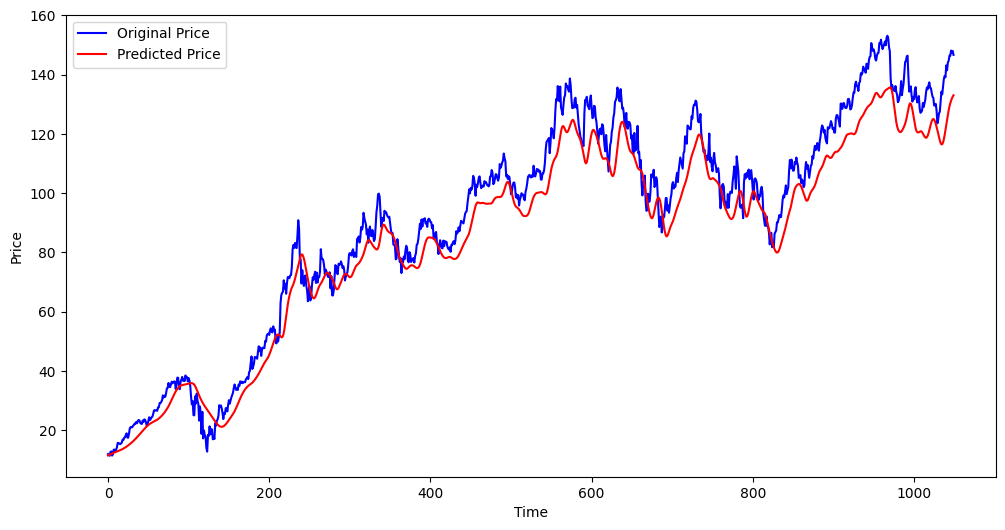

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()